## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. Hypothesis
#### 4. Data cleaning
#### 5. Exploratory data analysis
#### 6. Data prep for regression analysis
#### 7. Regression analysis
#### 8. Model performance statistics
#### 9. Comparison of predicted values against actual values
#### 10. Reflections on model performance

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Advanced Analytics & Dashboard Design\Competitive_LoL_Analysis'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Advanced Analytics & Dashboard Design\\Competitive_LoL_Analysis'

In [4]:
# Import league competitive data
df_lol = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'competitve_data_cleaned_country.csv'), index_col = False)

In [5]:
# Check output
df_lol.head()

,gameid,league,year,date,game,patch,participantid,side,position,champion,...,teamkills,teamdeaths,damagetochampions,damageshare,totalgold,golddiffat15,xpdiffat15,kda,region,country
0,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,1,Blue,top,Renekton,...,10,14,10063,0.286116,12202,1690.0,-346.0,2.0,Europe,United Kingdom
1,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,2,Blue,jng,Nocturne,...,10,14,4562,0.129709,9892,-378.0,74.0,2.0,Europe,United Kingdom
2,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,3,Blue,mid,Akali,...,10,14,11408,0.324358,10279,279.0,-330.0,1.0,Europe,United Kingdom
3,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,4,Blue,bot,Kalista,...,10,14,6014,0.170993,11703,213.0,1319.0,2.0,Europe,United Kingdom
4,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,5,Blue,sup,Pyke,...,10,14,3124,0.088823,7580,-75.0,-1313.0,1.0,Europe,United Kingdom


In [7]:
# Print number of rows and columns in df_lol
df_lol.shape

(10512, 35)

## 3. Hypothesis

#### The hypothesis i am looking to test is: The higher the golddiffat15 is, the higher the xpdiffat15 will be. 

## 4. Data cleaning

In [9]:
# Remove data from China region as they do not contains information on golddiffat15 and xpdiffat15
df_lol_eunakr = df_lol.loc[df_lol['region'] != 'China']

In [10]:
df_lol_eunakr['region'].value_counts()

region
Korea            2904
Europe           2076
North America    1032
Name: count, dtype: int64

In [11]:
# Remove data from position which have team, as we are only looking at individual player data
df_lol_indi = df_lol_eunakr.loc[df_lol_eunakr['position'] != 'team']

In [13]:
# Checking the there is any missing data for xpdiffat15 and golddiffat15
df_lol_indi.isnull().sum()

gameid                  0
league                  0
year                    0
date                    0
game                    0
patch                   0
participantid           0
side                    0
position                0
champion                0
ban1                    0
ban2                    0
ban3                    0
ban4                   10
ban5                    5
pick1                5010
pick2                5010
pick3                5010
pick4                5010
pick5                5010
gamelength              0
result                  0
kills                   0
deaths                  0
assists                 0
teamkills               0
teamdeaths              0
damagetochampions       0
damageshare             0
totalgold               0
golddiffat15            0
xpdiffat15              0
kda                     0
region                  0
country                 0
dtype: int64

## 5. Exploratory data analysis

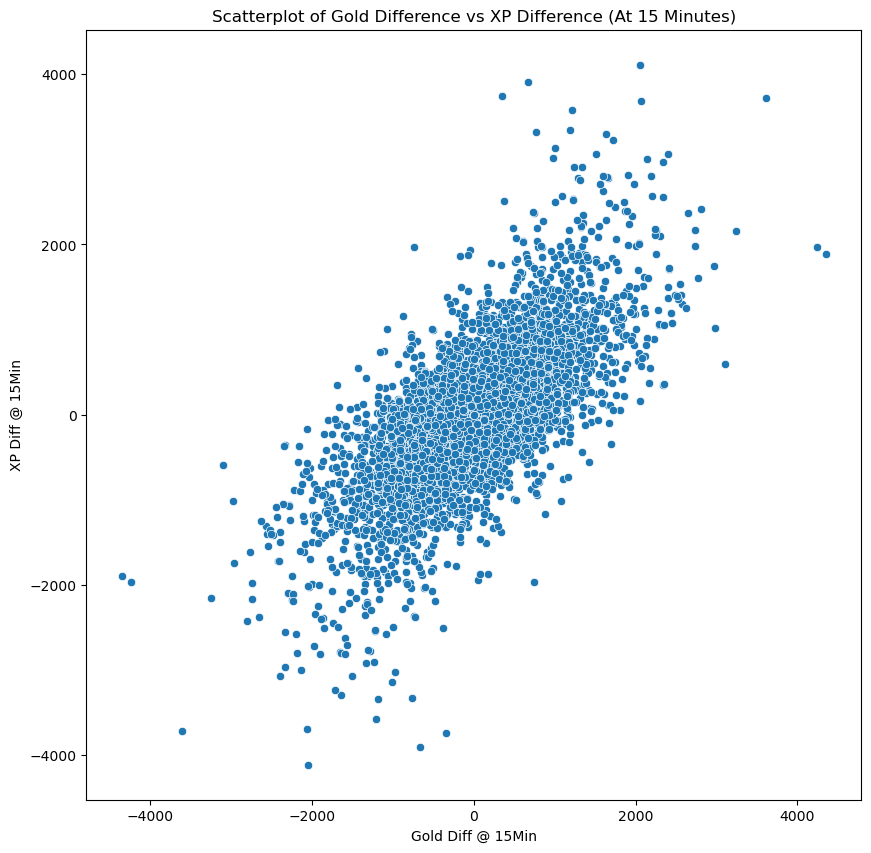

In [15]:
# Scatterplot to visualize the relationship between xpdiffat15 and golddiffat15
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_lol_indi, x='golddiffat15', y='xpdiffat15')
plt.title('Scatterplot of Gold Difference vs XP Difference (At 15 Minutes)')
plt.xlabel('Gold Diff @ 15Min')
plt.ylabel('XP Diff @ 15Min')
plt.show()

## 6. Data prep for regression analysis

In [16]:
# Define the independent variable (x: golddiffat15) and the dependent variable (y: xpdiffat15)
X = df_lol_indi['golddiffat15'].values.reshape(-1, 1)
y = df_lol_indi['xpdiffat15'].values.reshape(-1, 1)

In [20]:
X

array([[ 1690.],
       [ -378.],
       [  279.],
       ...,
       [-1262.],
       [ 2981.],
       [   35.]])

In [21]:
y

array([[-346.],
       [  74.],
       [-330.],
       ...,
       [-539.],
       [1017.],
       [ 184.]])

In [22]:
# Split data into 2 data set: 70% training set, 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3507, 1)
X_test shape: (1503, 1)
y_train shape: (3507, 1)
y_test shape: (1503, 1)


## 7. Regression analysis

In [24]:
# Create regression object
regression = LinearRegression()

In [26]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict on the test data
y_predict = regression.predict(X_test)

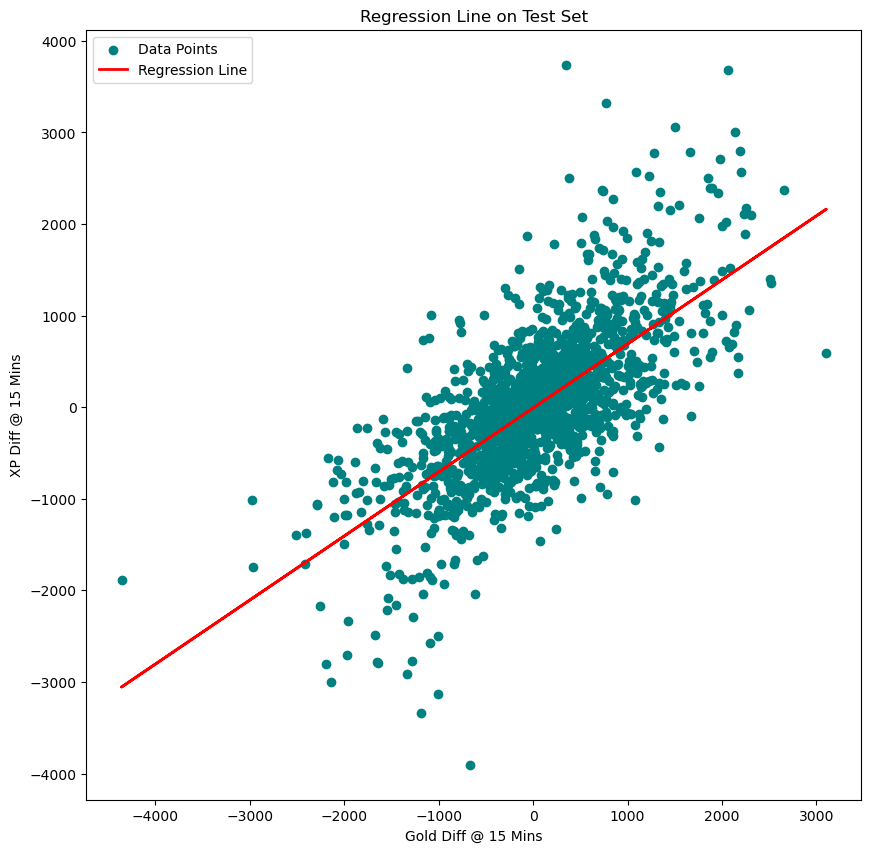

In [33]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='#008080', label='Data Points')
plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Gold Diff @ 15 Mins')
plt.ylabel('XP Diff @ 15 Mins')
plt.legend()

# Export to the "Visualizations" folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set_xp_gold_diff.png')
plt.savefig(file_name);

### Interpretation of results:
#### The scatterplot and regression line shows a positive relationship between the 2 variables (golddiffat15 and xpdiffat15) with quite a number of the points slightly away from the regression lines, indicating that it might not be a very strong fit.

## 8. Model performance statistics

In [39]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 347125.01592399325
R2 Score: 0.4879523719679827


## 9. Comparison of predicted values against actual values

In [41]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

In [43]:
# Check data frame created
comparison_df.head(30)

,Actual,Predicted
0,29.0,249.990951
1,975.0,731.119645
2,173.0,23.412903
3,113.0,308.733407
4,-164.0,481.464203
5,344.0,135.303297
6,-682.0,-297.572665
7,-344.0,-654.922611
8,-31.0,-327.643209
9,1269.0,63.973171


In [44]:
# Check data frame shape
comparison_df.shape

(1503, 2)

## 10. Reflections on model performance

#### The high MSE(347125) shows that the model is not a very good esitmator for the regression models as there are quite a number of points which was observe to be far from the line, indicating a poor fit.

#### The low r-squared values(0.488) is also an indicator that this model is a poor fit as it tells us that there is high variance in the data.

#### Overall, i would say this linear regression model is not very good at predicting the xpdiffat15 based on the golddiffat15, this could be that there might be more factors involved which affect the prediction.